# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.options.display.float_format = '{:,.0f}'.format

In [4]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000",108,2019-03-07T00:00:00,3,3,16,51,8,NaN,...,25,NaN,Санкт-Петербург,"18,863","16,028",1,482,2,755,NaN
1,7,"3,350,000",40,2018-12-04T00:00:00,1,NaN,11,19,1,NaN,...,11,2,посёлок Шушары,"12,817","18,603",0,NaN,0,NaN,81
2,10,"5,196,000",56,2015-08-20T00:00:00,2,NaN,5,34,4,NaN,...,8,0,Санкт-Петербург,"21,741","13,933",1,90,2,574,558
3,0,"64,900,000",159,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,"28,098","6,800",2,84,3,234,424
4,2,"10,000,000",100,2018-06-19T00:00:00,2,3,14,32,13,NaN,...,41,NaN,Санкт-Петербург,"31,856","8,098",2,112,1,48,121
5,10,"2,890,000",30,2018-09-10T00:00:00,1,NaN,12,14,5,NaN,...,9,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55
6,6,"3,700,000",37,2017-11-02T00:00:00,1,NaN,26,11,6,NaN,...,14,1,посёлок Парголово,"52,996","19,143",0,NaN,0,NaN,155
7,5,"7,915,000",72,2019-04-18T00:00:00,2,NaN,24,NaN,22,NaN,...,19,2,Санкт-Петербург,"23,982","11,634",0,NaN,0,NaN,NaN
8,20,"2,900,000",33,2018-05-23T00:00:00,1,NaN,27,15,26,NaN,...,9,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189
9,18,"5,400,000",61,2017-02-26T00:00:00,3,2,9,44,7,NaN,...,6,2,Санкт-Петербург,"50,898","15,008",0,NaN,0,NaN,289


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

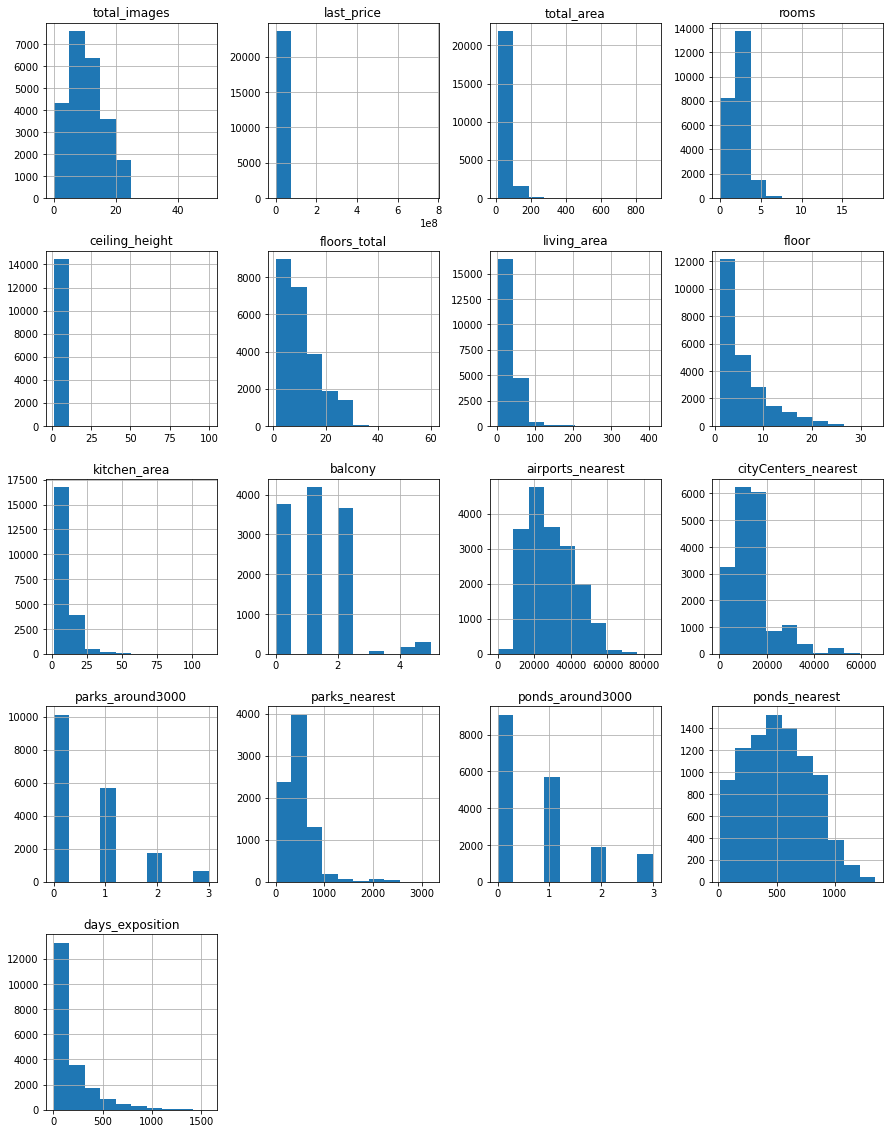

In [6]:
data.hist(figsize=(15, 20));

### Предобработка данных

In [7]:
# определяем пропущенные значения
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [9]:
# заполняем пропущенные значения
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
# data['floors_total'].fillna(data['floors_total'].median(), inplace=True)
data['floors_total'].dropna(inplace=True)
# data['living_area'].fillna(data['living_area'].median(), inplace=True)
data['is_apartment'] = data['is_apartment'].fillna(value=False)
# data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)
data['balcony'] = data['balcony'].fillna(0)
data['locality_name'].dropna(inplace=True)
# data['days_exposition'].fillna(data['days_exposition'].median(), inplace=True)
data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median(), inplace=True)

1. Нашлось 37. Удалим для чистоты эксперемента.

2. Да, таких 672. Посмотрим на результат без заполнения. 
    
3. Посмотрим на выводы без искуственного заполнения. 


Обнаружены пропущенные значения:
- ceiling_height      9195  высота потолков
- floors_total        86    всего этажей в доме
- living_area         1903  жилая площадь
- is_apartment        20924 апартаменты
- kitchen_area        2278  площадь кухни
- balcony             11519 число балконов
- locality_name       49    название населённого пункта
- airports_nearest    5542  расстояние до ближайшего аэропорта
- cityCenters_nearest 5519  расстояние до центра города
- parks_around3000    5518  число парков в радиусе
- parks_nearest       15620 расстояние до ближайшего парка
- ponds_around3000    5518  число водоёмов в радиусе
- ponds_nearest       14589 расстояние до ближайшего водоёма
- days_exposition     3181  сколько дней было размещено объявление

Причины пропусков могут быть разными. Артефакты, человеческий фактор или заполнение было необязательным.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [11]:
# изменяем типы данных
data['last_price'] = round(data['last_price']).astype(int)

In [12]:
data['balcony'] = data['balcony'].astype(int)

In [13]:
data['total_area'] = round(data['total_area']).astype(int)

In [14]:
# data['kitchen_area'] = round(data['kitchen_area']).astype(int)

In [15]:
# data['living_area'] = round(data['living_area']).astype(int)

In [16]:
# data['floors_total'] = data['floors_total'].astype(int)

In [17]:
# data['days_exposition'] = data['days_exposition'].astype(int)

In [18]:
# преобразовываем формат даты публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [19]:
# проверка
# print(data.query('floors_total < floor')['floors_total'].count())

In [20]:
# print(data.query('(kitchen_area + living_area) > total_area')['total_area'].count())

Конвертируем тип данных для удобства и производительности, значения floors_total и balcony всегда будут кратны 1. Кроме ceiling_height все данные float можно округлить и преобразовать в int.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  int64         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [22]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,3,16,51,8,False,...,25,0,Санкт-Петербург,"18,863","16,028",1,482,2,755,NaN
1,7,3350000,40,2018-12-04,1,3,11,19,1,False,...,11,2,посёлок Шушары,"12,817","18,603",0,NaN,0,NaN,81
2,10,5196000,56,2015-08-20,2,3,5,34,4,False,...,8,0,Санкт-Петербург,"21,741","13,933",1,90,2,574,558
3,0,64900000,159,2015-07-24,3,3,14,NaN,9,False,...,NaN,0,Санкт-Петербург,"28,098","6,800",2,84,3,234,424
4,2,10000000,100,2018-06-19,2,3,14,32,13,False,...,41,0,Санкт-Петербург,"31,856","8,098",2,112,1,48,121
5,10,2890000,30,2018-09-10,1,3,12,14,5,False,...,9,0,городской посёлок Янино-1,NaN,"13,098",NaN,NaN,NaN,NaN,55
6,6,3700000,37,2017-11-02,1,3,26,11,6,False,...,14,1,посёлок Парголово,"52,996","19,143",0,NaN,0,NaN,155
7,5,7915000,72,2019-04-18,2,3,24,NaN,22,False,...,19,2,Санкт-Петербург,"23,982","11,634",0,NaN,0,NaN,NaN
8,20,2900000,33,2018-05-23,1,3,27,15,26,False,...,9,0,посёлок Мурино,NaN,"13,098",NaN,NaN,NaN,NaN,189
9,18,5400000,61,2017-02-26,3,2,9,44,7,False,...,6,2,Санкт-Петербург,"50,898","15,008",0,NaN,0,NaN,289


In [23]:
data.tail(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23684,20,21400000,145,2018-11-02,4,3,26,71,17,False,...,16,0,Санкт-Петербург,"11,827","11,459",0,NaN,0,NaN,NaN
23685,15,2490000,31,2019-01-24,1,2,5,17,5,False,...,6,1,Ломоносов,"48,393","51,818",0,NaN,0,NaN,NaN
23686,8,3300000,31,2017-04-29,1,3,9,18,6,False,...,6,0,Санкт-Петербург,"11,751","11,602",1,140,1,317,193
23687,6,3200000,39,2017-12-16,1,3,9,20,6,False,...,11,2,Санкт-Петербург,"40,837","16,704",0,NaN,0,NaN,38
23688,19,9200000,101,2019-04-01,3,3,15,63,12,False,...,15,0,Санкт-Петербург,"15,632","14,428",0,NaN,0,NaN,23
23689,13,3550000,35,2018-02-28,1,3,15,16,4,False,...,9,2,Санкт-Петербург,"17,284","16,081",1,353,2,652,29
23690,3,5500000,52,2018-07-19,2,3,5,31,2,False,...,6,0,Санкт-Петербург,"20,151","6,263",1,300,0,NaN,15
23691,11,9470000,73,2016-10-13,2,3,25,40,7,False,...,11,1,Санкт-Петербург,"19,424","4,489",0,NaN,1,806,519
23692,2,1350000,30,2017-07-07,1,3,5,18,4,False,...,6,0,Тихвин,NaN,"13,098",NaN,NaN,NaN,NaN,413
23693,9,4600000,62,2016-08-05,3,3,9,40,8,False,...,8,0,Петергоф,"45,602","34,104",1,352,1,675,239


In [24]:
data.duplicated().sum()

0

In [25]:
# меняем название столбца
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

In [26]:
# переводим к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

In [27]:
# меняем все ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [28]:
# устранены неявные дубликаты
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')

In [29]:
# устраняем редкие и выбивающиеся значения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699","23,699","23,699","23,699","23,699","23,613","21,796","23,699","21,421","23,699","18,157","23,699","18,181","8,079","18,181","9,110","20,518"
mean,10,"6,541,549",60,2,3,11,34,6,11,1,"28,794","13,937",1,491,1,518,181
std,6,"10,887,013",36,1,1,7,22,5,6,1,"12,631","7,554",1,342,1,278,220
min,0,"12,190",12,0,1,1,2,1,1,0,0,181,0,1,0,13,1
25%,6,"3,400,000",40,1,3,5,19,2,7,0,"18,585","10,927",0,288,0,294,45
50%,9,"4,650,000",52,2,3,9,30,4,9,0,"26,726","13,098",0,455,1,502,95
75%,14,"6,800,000",70,3,3,16,42,8,12,1,"37,273","15,248",1,612,1,729,232
max,50,"763,000,000",900,19,100,60,410,33,112,5,"84,869","65,968",3,"3,190",3,"1,344","1,580"


In [30]:
data.drop(index=data.query('last_price < 500000').index,inplace=True)
data.drop(index=data.query('last_price > 30000000').index,inplace=True)
data['last_price'].describe()

count       23,369
mean     5,746,302
std      4,040,255
min        500,000
25%      3,400,000
50%      4,600,000
75%      6,650,000
max     30,000,000
Name: last_price, dtype: float64

In [31]:
data.drop(index=data.query('total_area < 15').index,inplace=True)
data.drop(index=data.query('total_area > 170').index,inplace=True)
data['total_area'].describe()

count   23,168
mean        57
std         24
min         15
25%         40
50%         51
75%         68
max        170
Name: total_area, dtype: float64

In [32]:
data.drop(index=data.query('rooms > 6').index,inplace=True)
# data.drop(index=data.query('rooms < 1').index,inplace=True)
data['rooms'].describe()

count   23,155
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max          6
Name: rooms, dtype: float64

In [33]:
data.drop(index=data.query('ceiling_height < 2').index,inplace=True)
data.drop(index=data.query('ceiling_height > 5').index,inplace=True)
data['ceiling_height'].describe()

count   23,121
mean         3
std          0
min          2
25%          3
50%          3
75%          3
max          5
Name: ceiling_height, dtype: float64

In [34]:
# data.drop(index=data.query('kitchen_area < 3').index,inplace=True)
data.drop(index=data.query('kitchen_area > 30').index,inplace=True)
data['kitchen_area'].describe()

count   20,716
mean        10
std          4
min          1
25%          7
50%          9
75%         12
max         30
Name: kitchen_area, dtype: float64

In [35]:
data.drop(index=data.query('floors_total > 30').index,inplace=True)
data['floors_total'].describe()

count   22,806
mean        11
std          7
min          1
25%          5
50%          9
75%         16
max         29
Name: floors_total, dtype: float64

In [36]:
data.drop(index=data.query('living_area < 7').index,inplace=True)
data.drop(index=data.query('living_area > 140').index,inplace=True)
data['living_area'].describe()

count   21,060
mean        32
std         16
min          8
25%         18
50%         30
75%         42
max        140
Name: living_area, dtype: float64

In [37]:
data.drop(index=data.query('airports_nearest < 5000').index,inplace=True)
data['airports_nearest'].describe()

count   17,394
mean    28,862
std     12,768
min      6,450
25%     18,420
50%     26,884
75%     37,434
max     84,869
Name: airports_nearest, dtype: float64

In [38]:
data.drop(index=data.query('days_exposition > 1200').index,inplace=True)
data['days_exposition'].describe()

count   19,824
mean       173
std        204
min          1
25%         44
50%         93
75%        224
max      1,200
Name: days_exposition, dtype: float64

### Посчитайте и добавьте в таблицу новые столбцы

In [39]:
# цена одного квадратного метра
data['m_price'] = data['last_price'] / data['total_area']

In [40]:
# день недели публикации объявления
data['day'] = data['first_day_exposition'].dt.weekday

In [41]:
# месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

In [42]:
# год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [43]:
# тип этажа квартиры
def floor_t(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_t, axis=1)

In [44]:
# расстояние до центра города в километрах
data['center_km'] = round(data['city_centers_nearest'] / 1000).astype(int)

### Проведите исследовательский анализ данных

count   22,802
mean        56
std         23
min         15
25%         40
50%         51
75%         67
max        170
Name: total_area, dtype: float64

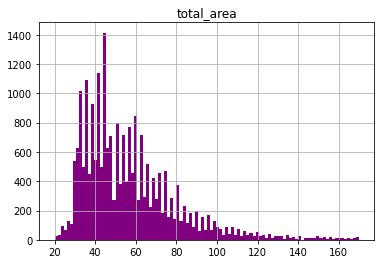

In [45]:
# общая площадь;
data.hist('total_area', bins=100, range=(20, 170), color='purple');
data['total_area'].describe()

средняя общая площадь 56 медиана 51. Нормальная площадь квартир от 40 до 63, что соответствует типовой застройке с квартирами от 1 до 3 комнат.

count   20,986
mean        32
std         16
min          8
25%         18
50%         30
75%         42
max        140
Name: living_area, dtype: float64

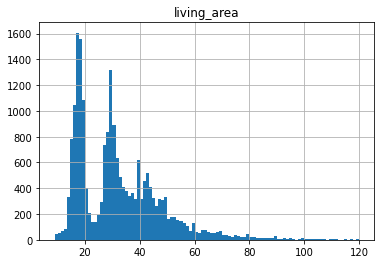

In [46]:
# жилая площадь;
data.hist('living_area', bins=100, range=(9, 120));
data['living_area'].describe()

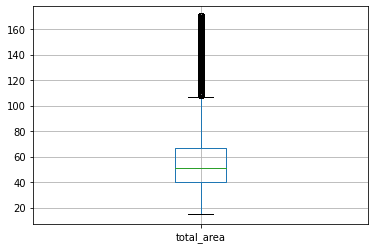

In [47]:
data.boxplot('total_area');

средняя жилая площадь 32 медиана 30

count   20,607
mean        10
std          4
min          1
25%          7
50%          9
75%         12
max         30
Name: kitchen_area, dtype: float64

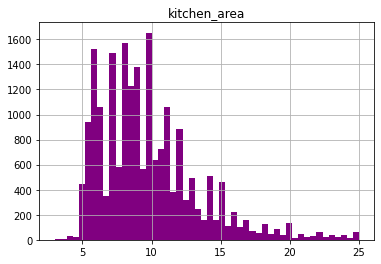

In [48]:
# площадь кухни;
data.hist('kitchen_area', bins=50, range=(3, 25), color='purple');
data['kitchen_area'].describe()

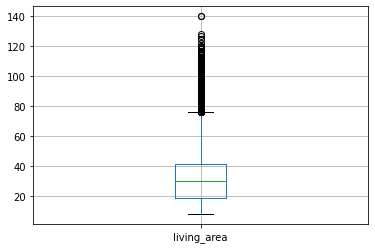

In [49]:
data.boxplot('living_area');

средняя площадь кухни 10 медиана 9

count       22,802
mean     5,511,169
std      3,601,289
min        500,000
25%      3,400,000
50%      4,550,000
75%      6,500,000
max     30,000,000
Name: last_price, dtype: float64

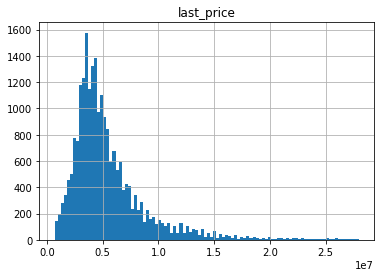

In [50]:
# цена объекта;
data.hist('last_price', bins=100, range=(700000, 28000000));
data['last_price'].describe()

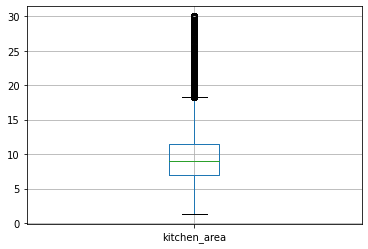

In [51]:
data.boxplot('kitchen_area');

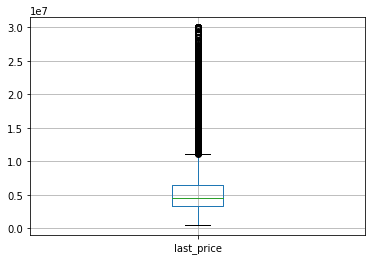

In [52]:
data.boxplot('last_price');

средняя цена объекта 5.5млн. медиана 4.5млн.

count   22,802
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max          6
Name: rooms, dtype: float64

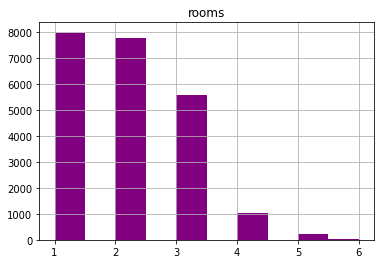

In [53]:
# количество комнат;
data.hist('rooms', bins=10, range=(1, 6), color='purple');
data['rooms'].describe()

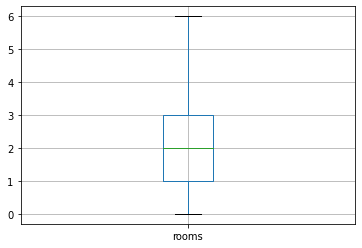

In [54]:
data.boxplot('rooms');

среднее количество комнат и медиана равно 2. Больше всего двух и однокомнатных объектов, больше трех значитольно меньше.

count   22,802
mean         3
std          0
min          2
25%          3
50%          3
75%          3
max          5
Name: ceiling_height, dtype: float64

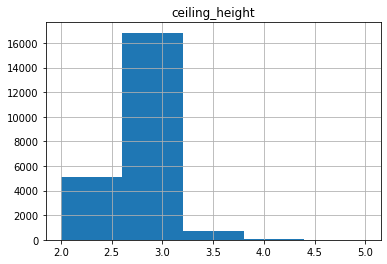

In [55]:
# высота потолков;
data.hist('ceiling_height', bins=5, range=(2, 5));
data['ceiling_height'].describe()

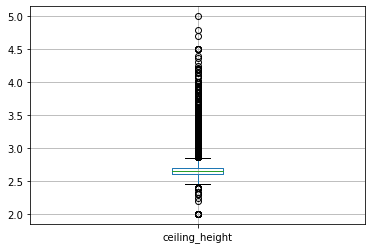

In [56]:
data.boxplot('ceiling_height');

Средняя высота потолков 2.68 медиана 2.65. В основном стандартная высота потолков от 2.6 до 3.1

count   22,802
mean         6
std          5
min          1
25%          2
50%          4
75%          8
max         27
Name: floor, dtype: float64

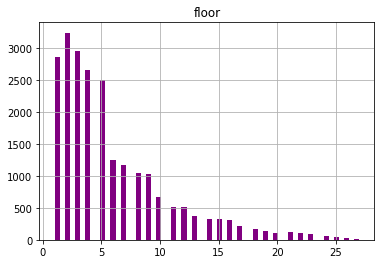

In [57]:
# этаж квартиры;
data.hist('floor', bins=60, range=(1, 27), color='purple');
data['floor'].describe()

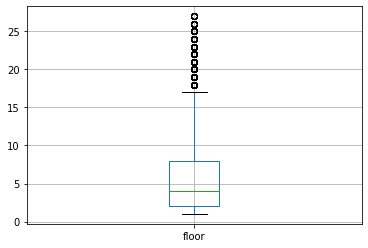

In [58]:
data.boxplot('floor');

Средний этаж квартиры 6 медиана 4.

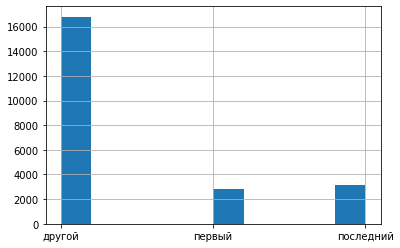

In [59]:
# тип этажа квартиры;
data['floor_type'].hist();

Первых этажей меньше чем последних, что на первый взгляд странно. Возможно это связанно с тем, что первые этажи переводят в коммерческую недвижимость и публикуются они в отдельной категории.

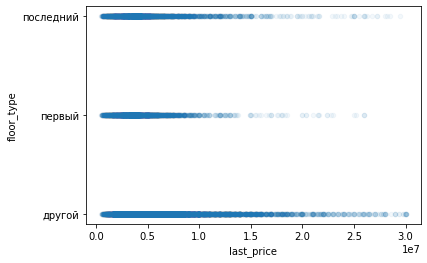

In [60]:
data.plot(x='last_price', y='floor_type', kind='scatter', alpha=0.05);

Стоимость на первом этаже самая низкая. Немного дороже на втором. Остальные стоят дороже. 

count   22,719
mean        11
std          7
min          1
25%          5
50%          9
75%         16
max         29
Name: floors_total, dtype: float64

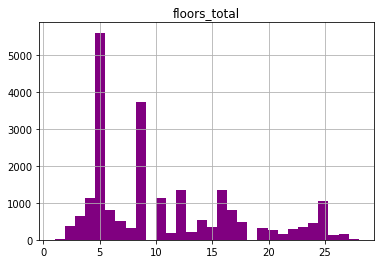

In [61]:
# общее количество этажей в доме;
data.hist('floors_total', bins=30, range=(1, 28), color='purple');
data['floors_total'].describe()

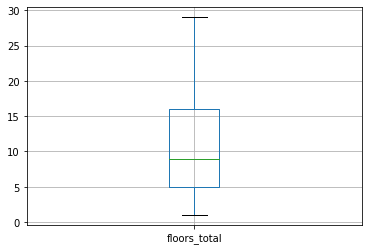

In [62]:
data.boxplot('floors_total');

Средняя высота домов 11 медиана 9. Два пика 5 и 9 этажные дома, типовая застройка.

count   22,802
mean        14
std          8
min          0
25%         11
50%         13
75%         15
max         66
Name: center_km, dtype: float64

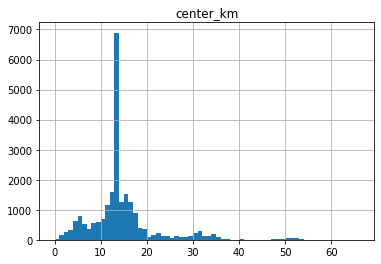

In [63]:
# расстояние до центра города;
data.hist('center_km', bins=66, range=(0, 66));
data['center_km'].describe()

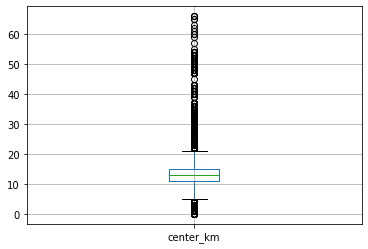

In [64]:
data.boxplot('center_km');

In [65]:
data['center_km'].describe()

count   22,802
mean        14
std          8
min          0
25%         11
50%         13
75%         15
max         66
Name: center_km, dtype: float64

count   17,325
mean    28,865
std     12,772
min      6,450
25%     18,410
50%     26,895
75%     37,434
max     84,869
Name: airports_nearest, dtype: float64

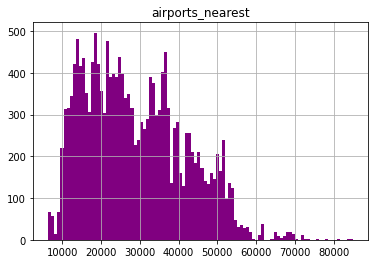

In [66]:
# расстояние до ближайшего аэропорта;
data.hist('airports_nearest', bins=100, range=(6450, 84853), color='purple');
data['airports_nearest'].describe()

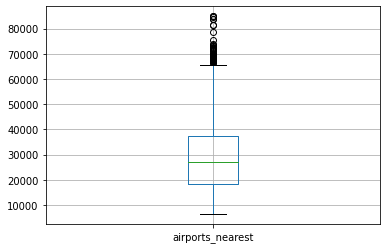

In [67]:
data.boxplot('airports_nearest');

In [68]:
data['airports_nearest'].describe()

count   17,325
mean    28,865
std     12,772
min      6,450
25%     18,410
50%     26,895
75%     37,434
max     84,869
Name: airports_nearest, dtype: float64

Среднее расстояние до аэропорта 29км, медиана 27км.  

count   7,543
mean      494
std       339
min         1
25%       290
50%       457
75%       616
max     3,190
Name: parks_nearest, dtype: float64

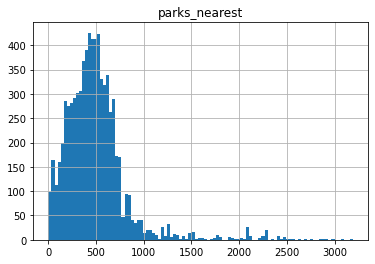

In [69]:
# расстояние до ближайшего парка;
data.hist('parks_nearest', bins=100, range=(1, 3190));
data['parks_nearest'].describe()

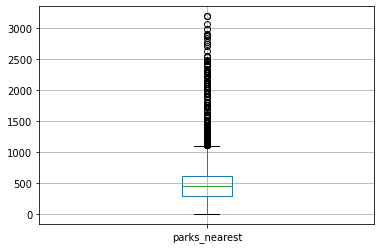

In [70]:
data.boxplot('parks_nearest');

In [71]:
data['parks_nearest'].describe()

count   7,543
mean      494
std       339
min         1
25%       290
50%       457
75%       616
max     3,190
Name: parks_nearest, dtype: float64

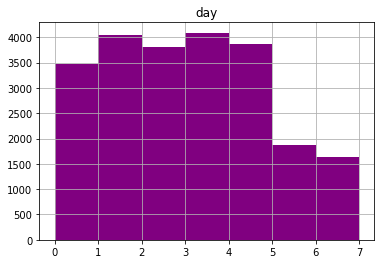

In [72]:
# день публикации объявления
data.hist('day', bins=7, range=(0, 7), color='purple');

count   22,802
mean         6
std          3
min          1
25%          3
50%          6
75%         10
max         12
Name: month, dtype: float64

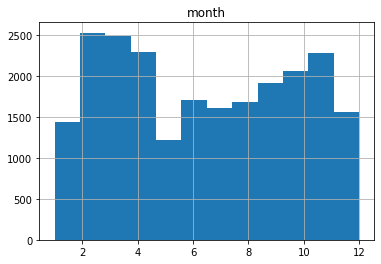

In [73]:
# месяц публикации объявления
data.hist('month', bins=12, range=(1, 12));
data['month'].describe()

count   19,824
mean       173
std        204
min          1
25%         44
50%         93
75%        224
max      1,200
Name: days_exposition, dtype: float64

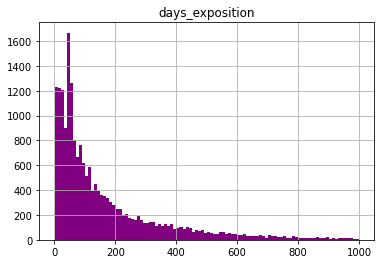

In [74]:
# как быстро продавались квартиры
data.hist('days_exposition', bins=100, range=(1, 1000), color='purple');
data['days_exposition'].describe()

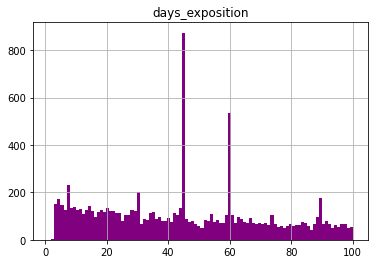

In [75]:
data.hist('days_exposition', bins=100, range=(1, 100), color='purple');

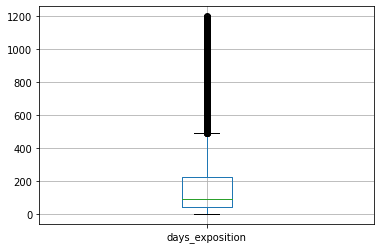

In [76]:
data.boxplot('days_exposition');

Продажи до 45 дней можно считать быстрыми, а более 190 дней необычно долгими. В среднем объекты продаются за 156 дней, медиана 95 дней.

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22802 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22802 non-null  int64         
 1   last_price            22802 non-null  int64         
 2   total_area            22802 non-null  int64         
 3   first_day_exposition  22802 non-null  datetime64[ns]
 4   rooms                 22802 non-null  int64         
 5   ceiling_height        22802 non-null  float64       
 6   floors_total          22719 non-null  float64       
 7   living_area           20986 non-null  float64       
 8   floor                 22802 non-null  int64         
 9   is_apartment          22802 non-null  bool          
 10  studio                22802 non-null  bool          
 11  open_plan             22802 non-null  bool          
 12  kitchen_area          20607 non-null  float64       
 13  balcony         

In [78]:
# факторы больше всего влияющие на общую стоимость объекта
parameter = ['total_area','living_area','kitchen_area','rooms','day','month','year']
for x in parameter:
    c = data['last_price'].corr(data[x])
    print(f'Влияние {x} на общую стоимость объекта: {c:0.2%}')

Влияние total_area на общую стоимость объекта: 76.72%
Влияние living_area на общую стоимость объекта: 66.27%
Влияние kitchen_area на общую стоимость объекта: 55.98%
Влияние rooms на общую стоимость объекта: 47.84%
Влияние day на общую стоимость объекта: -1.70%
Влияние month на общую стоимость объекта: 0.52%
Влияние year на общую стоимость объекта: -1.94%


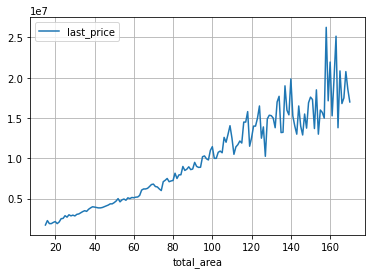

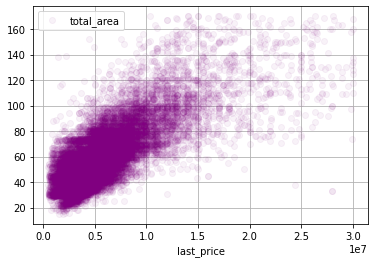

In [79]:
# общая площадь
data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(grid=True);
data.plot(x='last_price', # столбец значений для горизонтальной оси
y='total_area', # столбец значений для вертикальной оси
style='o', # стиль заполнения:'o'(точечный) или 'o-'(точечно-линейный)
grid=True, alpha=0.05, color='purple'); # отображать сетку или нет, прозрачность, цвет

Чем больше общая площадь тем выше общая стоимость объекта. Сильная корреляция, прямая пропорциональность.

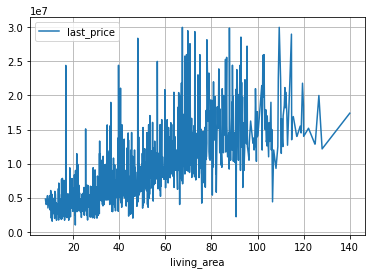

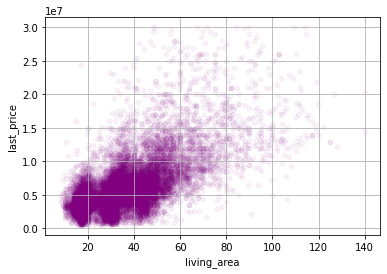

In [80]:
# жилая площадь
data.pivot_table(index='living_area', values='last_price', aggfunc='median').plot(grid=True)
data.plot(x='living_area', y='last_price', kind='scatter', grid=True, alpha=0.05, color='purple');

Чем больше жилая площадь тем выше общая стоимость объекта. Сильная корреляция.

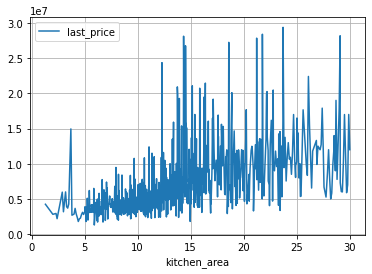

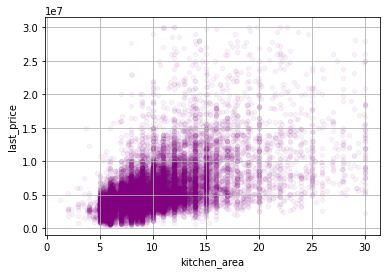

In [81]:
# площадь кухни
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').plot(grid=True);
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, alpha=0.05, color='purple');

Чем больше площадь кухни тем выше общая стоимость объекта. Сильная корреляция.

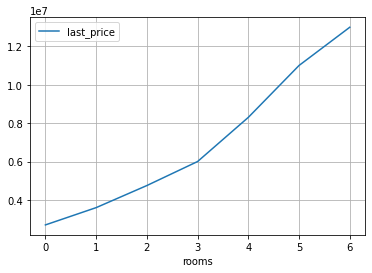

In [82]:
# количество комнат
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(grid=True);

Чем больше комнат тем выше общая стоимость объекта. Сильная корреляция.

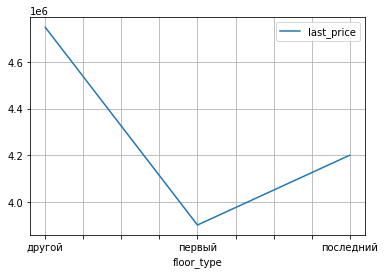

In [83]:
# тип этажа
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True);

Стоимость объектов на первом этаже самая низкая. Немного дороже на последнем. Остальные стоят дороже.

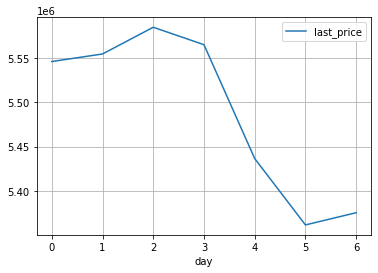

In [84]:
# день размещения объявления
data.pivot_table(index='day', values='last_price').plot(grid=True);

В конце недели цена снижается.

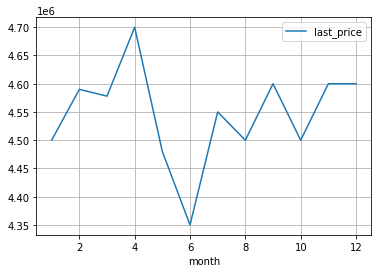

In [85]:
# месяц размещения объявления
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(grid=True);

В июне стоимость ниже, возможно это связано с отпусками. Пик стоимости приходится на апрель.

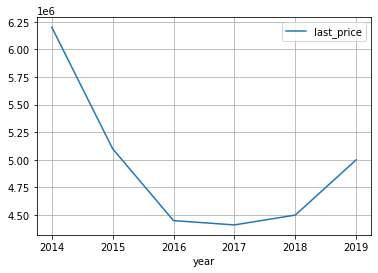

In [86]:
# год размещения объявления
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(grid=True);

В 2014 году цены были на пике. Минимальные цены были в 2016-2018г.

In [87]:
# средняя цена одного квадратного метра в 10 населённых пунктах
localities = data['locality_name'].value_counts().head(10)
localities_m_price = data.query('locality_name in (@localities.index)').pivot_table(index='locality_name', values='m_price')
localities_m_price = localities_m_price.astype(int)
localities_m_price.sort_values('m_price', ascending=False).style.background_gradient('coolwarm')

,m_price
locality_name,
санкт-петербург,110031
пушкин,102773
деревня кудрово,92578
поселок парголово,90265
поселок мурино,85648
поселок шушары,78757
колпино,75357
гатчина,68665
всеволожск,68627


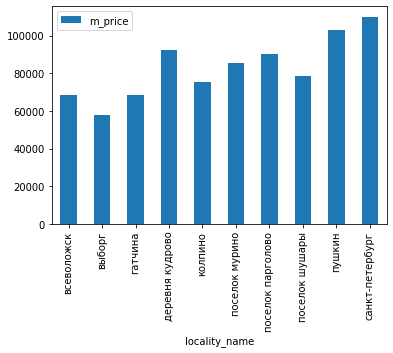

In [88]:
localities_m_price.plot(y='m_price', kind='bar');

Самая высокая стоимость квадратного метра в Санкт-Петербурге 109477.
 
Самая низкая стоимость квадратного метра в Выборге 58272.

In [89]:
# средняя цена каждого километра
(data[data['locality_name']=='санкт-петербург'].pivot_table(index='center_km', values='m_price', aggfunc='mean')).sort_values('center_km', ascending=True).style.background_gradient('coolwarm')

,m_price
center_km,
0,121286.558530
1,143566.516921
2,128155.338166
3,116228.524738
4,124534.366731
5,131640.548441
6,130495.492461
7,130838.192106
8,122069.464720


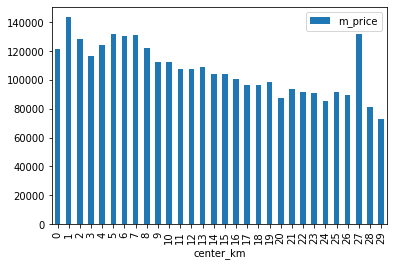

In [90]:
(data.query('locality_name == "санкт-петербург"').pivot_table(index='center_km', values='m_price' , aggfunc='mean').plot(kind='bar'));

Выделяется 27км, возможно это дорогие ЖК или коттеджи.

### Общий вывод

<h4>Факторы больше всего влияющие на общую стоимость объекта:
    
- общая площадь: 76.33%  
    
- жилая площадь: 61.88%  
    
- площадь кухни: 51.61%  
    
- количество комнат: 47.64%  
    
Стоимость объектов на первом этаже самая низкая. Немного дороже на последнем. Остальные стоят дороже.
    
При удалении от центра цена снижается, кроме 27км, возможно это дорогие ЖК или коттеджи.
    
В июне стоимость ниже, возможно это связано с отпусками.
В 2014 году цены были на пике. Минимальные цены были в 2016-2018г.
    
    
Продажи до 45 дней можно считать быстрыми, а более 190 дней необычно долгими. В среднем объекты продаются за 156 дней, медиана 95 дней.
 
Самая высокая стоимость квадратного метра в Санкт-Петербурге 109477.
Самая низкая стоимость квадратного метра в Выборге 58272.</h4>

- средняя общая площадь 56 медиана 51. Нормальная площадь квартир от 40 до 63, что соответствует типовой застройке с квартирами от 1 до 3 комнат
- средняя жилая площадь 32 медиана 30
- средняя площадь кухни 10 медиана 9
- средняя цена объекта 5.5млн. медиана 4.5млн
- среднее количество комнат и медиана равно 2. Больше всего двух и однокомнатных объектов, больше трех значитольно меньше
- средняя высота потолков 2.68 медиана 2.65. В основном стандартная высота потолков от 2.6 до 3.1

Используем медианное значение так как оно более устойчивое к выбросам.
    
Баг-репорт, можно сделать заполнение всех данных обязательным условием для подачи объявлений.